In [1]:
import numpy as np
import dlsfunctions as dls
import initialization_data as init
import matplotlib.pyplot as plt

In [8]:
d = init.get_distance()

mean1 = init.get_left_mean()
sigma1 = init.get_wide_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_wide_sigma()

c = init.c
m = init.m
beta = init.beta

f = dls.generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)

time = init.get_log_time()
gamma = init.get_gamma()

noise = np.random.normal(mean1, sigma1, 200)*1e7

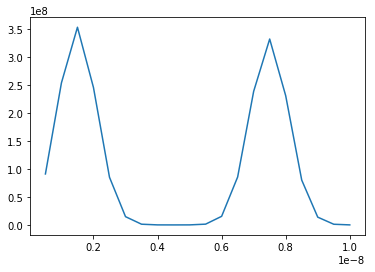

In [9]:
plt.plot(d,f)

In [10]:
dls.check_distribution_norm(f, d[1] - d[0])

1.0

In [11]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise

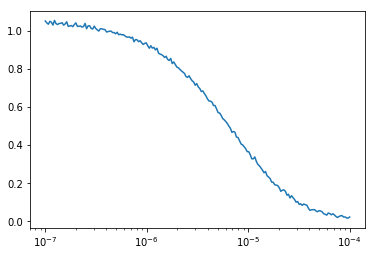

In [12]:
plt.semilogx(time, sim_data)

In [13]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [14]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.402, 0.35 , 0.358, 0.388, 0.361, 0.367, 0.374, 0.405, 0.388,
       0.413, 0.391, 0.358, 0.367, 0.391, 0.389, 0.378, 0.404, 0.392,
       0.386, 0.383, 0.394, 0.384, 0.384, 0.389, 0.387, 0.419, 0.341,
       0.358, 0.386, 0.365, 0.395, 0.343, 0.383, 0.398, 0.376, 0.387,
       0.355, 0.379, 0.397, 0.383, 0.393, 0.374, 0.383, 0.379, 0.355,
       0.392, 0.365, 0.358, 0.353, 0.384, 0.406, 0.429, 0.346, 0.373,
       0.373, 0.393, 0.381, 0.384, 0.363, 0.39 , 0.374, 0.382, 0.38 ,
       0.399, 0.377, 0.37 , 0.386, 0.411, 0.402, 0.353, 0.396, 0.358,
       0.383, 0.386, 0.393, 0.409, 0.403, 0.389, 0.384, 0.388, 0.369,
       0.407, 0.372, 0.379, 0.379, 0.365, 0.383, 0.399, 0.377, 0.365,
       0.37 , 0.402, 0.378, 0.348, 0.362, 0.391, 0.388, 0.398, 0.376,
       0.401])

In [15]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,3.495374e+06,1.708919e+08,1.356633e+07,8.542853e+07,9.853920e+07,2.007273e+08,1.828108e+08,2.172202e+08,1.130838e+08,1.001249e+08,1.451400e+07,1.040779e+07,3.455394e+08,3.030344e+08,1.195309e+08,1.054427e+08,2.713478e+07,504978.929431,2.189226e+06,2.784001e+07


In [16]:
infer = np.zeros(20)
infer[0] = 3.495374e+06
infer[1] = 1.708919e+08
infer[2] = 3.455394e+08
infer[3] = 3.030344e+08
infer[4] = 1.195309e+08
infer[5] = 1.054427e+08
infer[6] = 2.713478e+07
infer[7] = 504978.929431
infer[8] = 2.189226e+06
infer[9] = 2.784001e+07
infer[10] = 1.356633e+07
infer[11] = 8.542853e+07
infer[12] = 9.853920e+07
infer[13] = 2.007273e+08
infer[14] = 1.828108e+08
infer[15] = 2.172202e+08
infer[16] = 1.130838e+08
infer[17] = 1.001249e+08
infer[18] = 1.451400e+07
infer[19] = 1.040779e+07

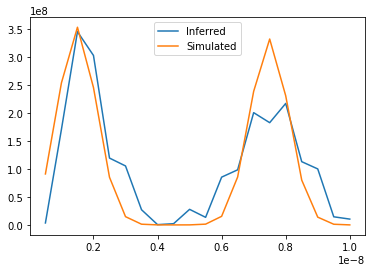

In [22]:
plt.plot(d, infer, label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

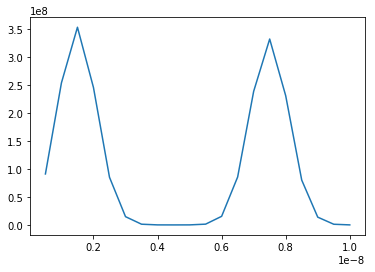

In [18]:
plt.plot(d, f)

In [20]:
beta_post = dls.get_beta(chained_sampler, ndim)
betaq = beta_post.quantile([0.5], axis=0)
betaq

,beta
0.5,1.2893


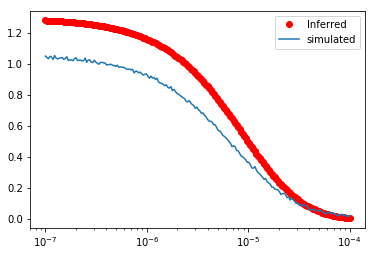

In [21]:
theta_infer = np.append(infer, 1.2893)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='simulated')
plt.legend()

In [ ]:
beta_posterior = beta_post.values.flatten()
plt.hist(beta_posterior)